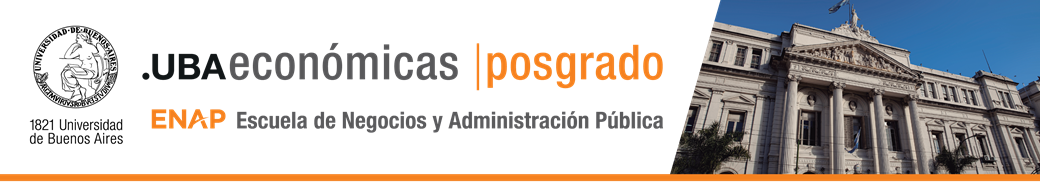


MAESTRÍA EN GESTIÓN Y ANÁLISIS DE DATOS FINANCIEROS (VIRTUAL)
# Fundamentos de Métodos Analíticos Predictivos (FMAP)
###**Trabajo Final**

Docentes: Rodrigo Del Rosso-Patricia Girimonte

Alumno: Benjamin, Macarena


# **Introduccion**

**Base de Datos**


Para este trabajo analizaremos una base de datos de una compañía de software del tipo SaaS, es decir, que se paga una suscripción mensual para el uso de la herramienta. La misma consiste en una herramienta de gestión de proyectos donde el principal diferencial respecto de la competencia es que le permite al usuario además de gestionar sus proyectos también cargar de horas dentro de los mismos para entender cuánto tiempo se trabaja en cada uno.
En general los suscriptores que abandonan la herramienta son aquellos que durante el último mes tuvieron muy bajo porcentaje de carga de horas.
La carga de horas es el principal diferencial de la herramienta dado que permite tener visibilidad de las horas insumidas en los proyectos trabajados. Si esto se mantiene bajo, es un indicio de que los usuarios no están registrando el tiempo insumido con lo cual, no están adoptando la herramienta, no están viendo el valor que les aporta la herramienta llevándolos así a dentro del corto plazo abandonarla.
Una de las variables que puede influir en la carga de horas es la actividad. Si los usuarios tienen baja actividad significa que utilizan poco la herramienta, que están ingresando poco o no están registrando ninguna actividad en la misma. La falta de uso puede implicar una falta de carga de horas lo cual en la experiencia ha llevado al abandono de la heramienta en el corto plazo.
También se cree que los suscriptores que menos pagan por mes son los que menos adoptan la herramienta porque no poseen servicios de soporte profesional para ayudarlos a utilizar la misma, con lo cual se les dificulta el aprendizaje y concluyen en un bajo uso y por lo tanto baja carga de horas.

Lo que nos interesa predecir es el % de carga de horas dentro del conjunto de suscriptores que pagan mensualmente en funcion de la actividad que tienen mensualmente dentro de la plataforma, el monto mensual que pagan por la suscripción y el riesgo de abandono historico que tienen asociado.
En este trabajo, se tomó la información de 217 suscriptores respecto al comportamiento mensual (noviembre 2023).

**Variables explicativas del modelo**:
- Suscriptores (los datos de los sucriptores seran numericos para preservar la identidad de los mismos).
- Pago mensual de suscripción (MRR)
- Cantidad de usuarios activos (act_users_q)
- % de usuarios activos respecto de la cantidad total de usuarios (% act_users)
- Días promedio de actividad al mes por usuario activo (avg_day_act_user)
- churn_risk: riesgo historico de abandono. Esta variable puede tomar valor 0 para riesgo bajo y 1 para riesgo alto-medio de abandono.


Aclaracion: cada suscriptor compra una determinada cantidad de licencias o usuarios. En general, a mayor cantidad de usuarios o licencias contratadas, mayor sera el pago de suscripcion mensual(MRR).




**Variable a predecir**: % de carga de horas (% loaded_hours)

La variable a predecir puede tomar valores continuos entre 0 y 1

Entonces, el tipo de problema a resolver es un problema de regresión ya que se busca predecir una variable continua.



# **Importacion de los datos**

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Definir el file_id para poder conectar al archivo. Este id se obtiene a partir de la URL que se genera al compartir el archivo con TODOS desde el Drive propio (luego de compartir -> Get Link).
# URL obtenida fue: https://docs.google.com/spreadsheets/d/1Y6VqccuhBeOORLQxjHkFbb7BsNrss4OQ/edit?usp=sharing&ouid=109766179583368220877&rtpof=true&sd=true
fileDownloaded = drive.CreateFile({'id':'1Y6VqccuhBeOORLQxjHkFbb7BsNrss4OQ'})

In [4]:
# Se descarga el archivo.
fileDownloaded.GetContentFile('BBDD.xlsx')

In [5]:
import pandas as pd
BBDD = pd.read_excel("/content/BBDD.xlsx")


# Se muestran los primeros registros para verificar que se haya importado correctamente
BBDD.head(10)

,Suscriptores,MRR,p_loaded_hrs,act_users_q,p_act_users,avg_day_act_user,churn_risk
0,1,2504.00,0.0014,48,0.1818,4.2742,1
1,2,1990.00,0.0061,31,0.6078,2.8318,1
2,3,697.50,0.0002,9,0.6923,3.2879,1
3,4,500.00,0.0000,5,0.5000,2.9591,1
4,5,595.20,0.2005,21,0.4286,5.5894,1
5,6,319.69,0.0000,6,0.4000,3.4523,1
6,7,378.72,0.0000,0,0.0000,0.0000,1
7,8,240.00,0.0000,1,0.0833,0.9864,1
8,9,173.60,0.0000,4,0.5714,1.9727,1
9,10,145.50,0.0000,0,0.0000,0.0000,1


# **1- Imputación de datos faltantes**



Evaluar la cantidad de datos faltantes en el dataset, tanto a nivel columna como a nivel fila.
Si el conjunto de datos elegido no tiene datos faltantes lo que sigue no se realiza.
Para el caso de datos faltantes por columnas indicar el porcentaje de registros que cumplen esta condición.
Con respecto a datos faltantes a nivel columna, calcular la distribución de la cantidad de columnas con datos
faltantes por fila.
Proponer y aplicar técnicas para completarlos.
Mostrar gráficamente la distribución de la variable antes y después de realizar la imputación.

In [6]:
#Importamos librerias que utilizaremos a fines del ejercicio
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # para seleccionar el conjunto de prueba y entrenamiento
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Verficamos si hay valores faltantes
valores_faltantes = BBDD.isnull().sum()
valores_faltantes

Suscriptores        0
MRR                 0
p_loaded_hrs        0
act_users_q         0
p_act_users         0
avg_day_act_user    0
churn_risk          0
dtype: int64

In [8]:
valores_faltantes.unique()

array([0])

In [9]:
# Ahora verificamos valores faltantes a nivel fila
valores_faltantes_filas = BBDD.isnull().sum(axis=1)
valores_faltantes_filas

0      0
1      0
2      0
3      0
4      0
      ..
212    0
213    0
214    0
215    0
216    0
Length: 217, dtype: int64

In [10]:
valores_faltantes_filas.unique()

array([0])

<Axes: >

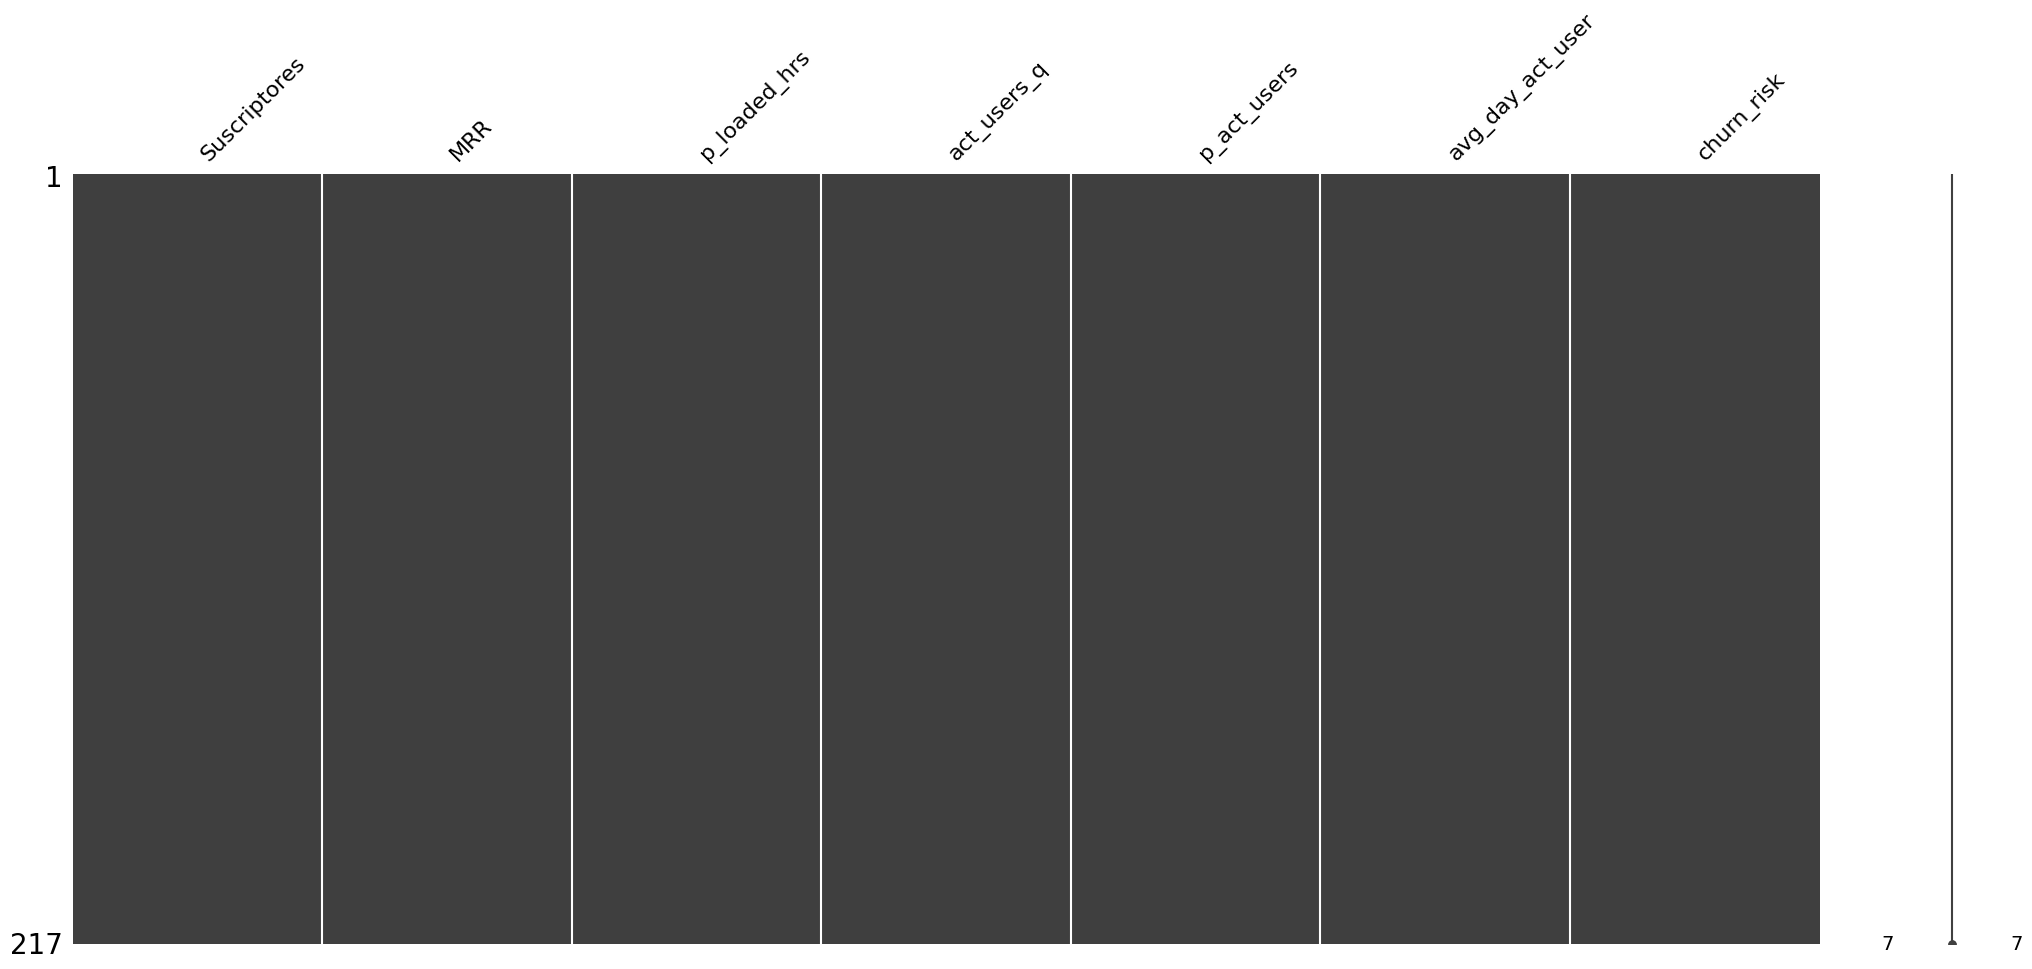

In [11]:
#Vemos graficamente las variables
msno.matrix(BBDD)

<Axes: >

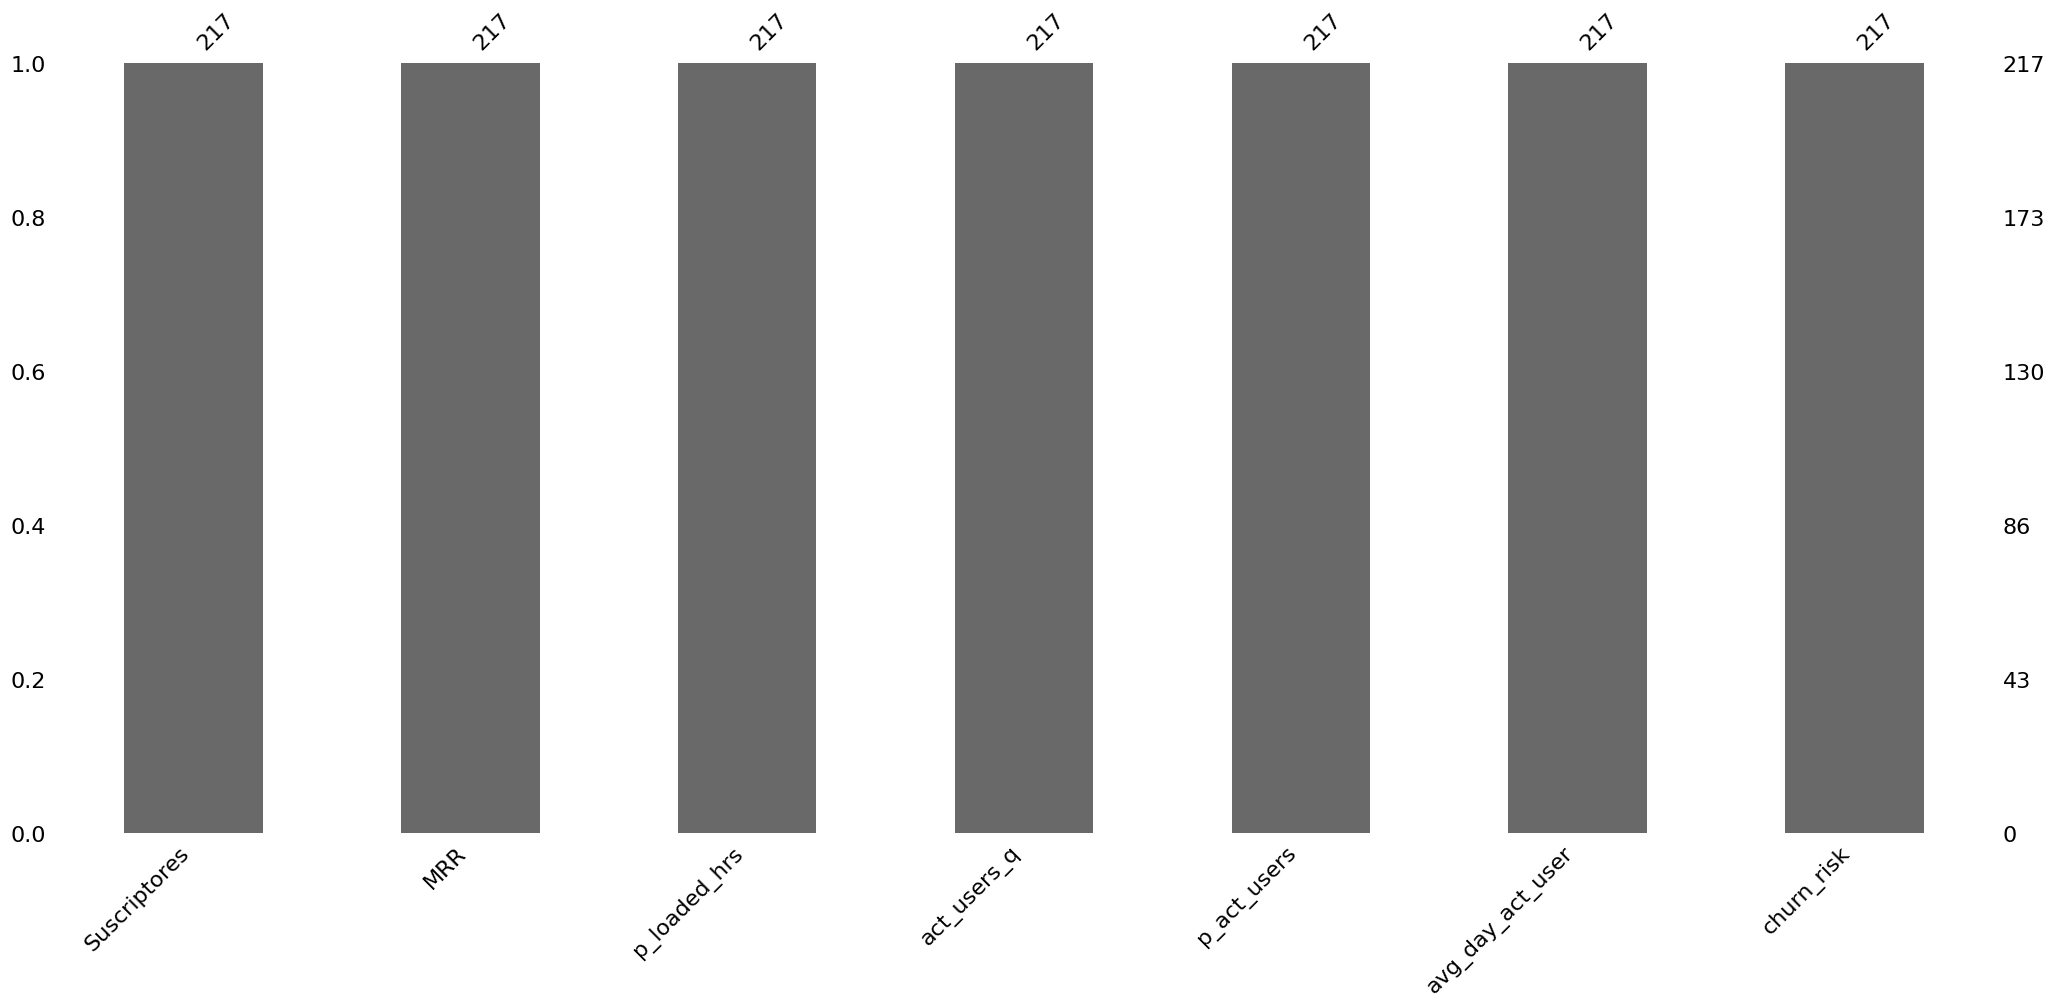

In [12]:
#Por ultimo miramos un grafico de bar missing
msno.bar(BBDD)

In [13]:
# Usamos otras funciones para chequear que no haya valores faltantes y con esto queda demostrado que no hay valores faltantes.
BBDD.isna().sum().sort_values()

Suscriptores        0
MRR                 0
p_loaded_hrs        0
act_users_q         0
p_act_users         0
avg_day_act_user    0
churn_risk          0
dtype: int64

# **2- Análisis exploratorio**

Realizar un análisis exploratorio sobre distintas variables de interés (mínimo una categórica y 2 cuantitativas).
Se deben tener en cuenta tanto variables cuantitativas como cualitativas, y se deben utilizar tanto gráficos
como medidas de resumen de las mismas.
Comentar si se aprecian relaciones entre ellas, y en tal caso analizarlas.

In [14]:
## Analisis descriptivo de las variables numericas
#Se quita del analisis a la variable "Suscriptores" y "churn_risk" dado que no aporta informacion en terminos numericos al ser variables categoricas
BBDD0 = BBDD.drop(['Suscriptores','churn_risk'], axis=1)

In [15]:
# Analisis descriptivo de las variables numericas
BBDD0.describe()

,MRR,p_loaded_hrs,act_users_q,p_act_users,avg_day_act_user
count,217.000000,217.000000,217.000000,217.000000,217.000000
mean,907.486671,0.487513,43.576037,0.857565,13.538521
std,1595.864710,0.308175,86.567812,0.241300,5.705423
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,270.200000,0.238900,10.000000,0.800000,10.060900
50%,511.680000,0.545500,20.000000,0.939400,14.857100
75%,1008.000000,0.742900,46.000000,1.000000,17.895500
max,20204.000000,1.035900,966.000000,1.333300,23.524800


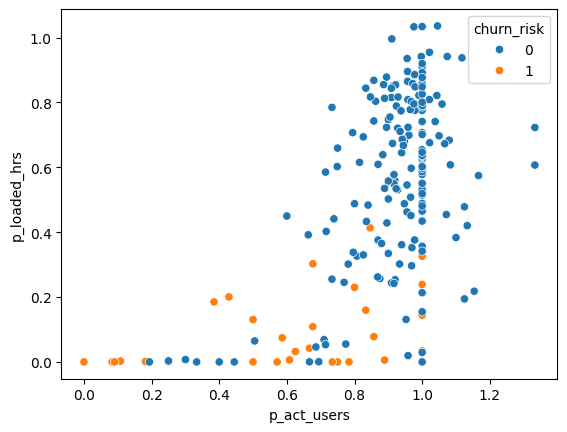

In [16]:
#Se analiza la relacion de la tasa de abandono de las variables y el % de usuarios activos con respecto al % de carga de horas

import matplotlib.pyplot as plt #para graficar
import seaborn as sns #para graficar
#Graficamos en la escala original
sns.scatterplot(x='p_act_users', y='p_loaded_hrs', hue='churn_risk', data=BBDD)

# Mostrar el gráfico
plt.show()

Como se observa en el grafico, quienes tienen mayor porcentaje de carga de horas son quienes tienen tasa de riesgo historico de abandono en 0 y porcentajes de usuarios activos en la herramienta mas altos.

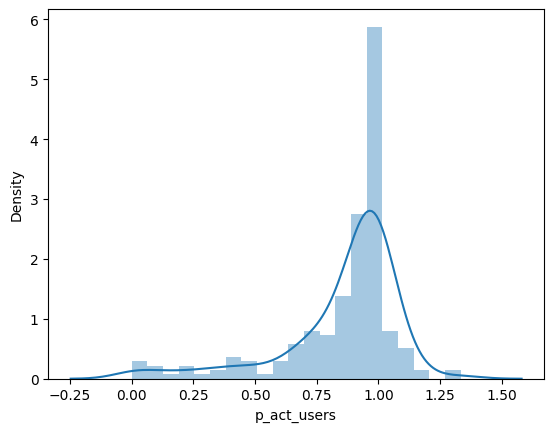

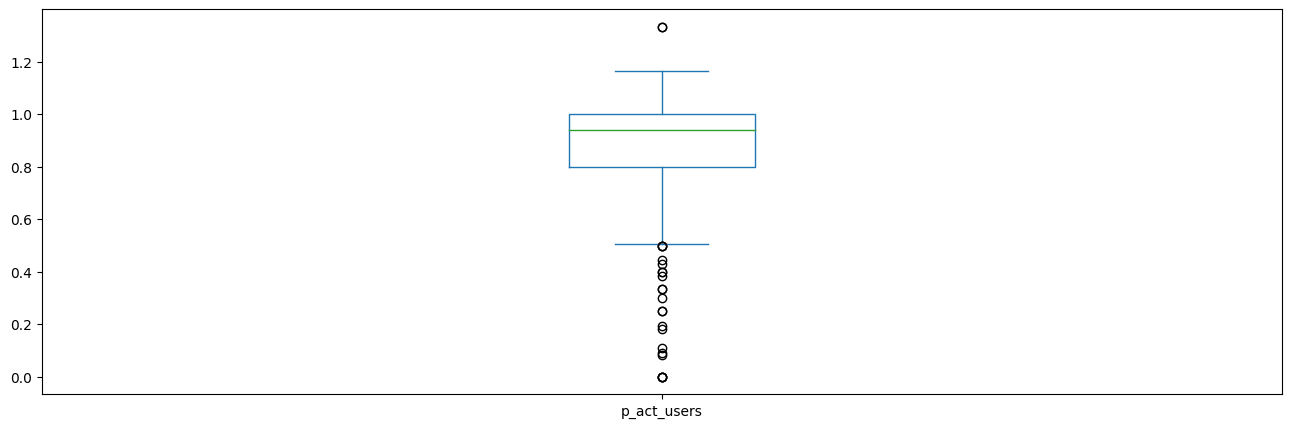

In [17]:
#Se analiza la distribucion del % de usuarios activos

sns.distplot(BBDD['p_act_users'])
plt.show()
BBDD['p_act_users'].plot.box(figsize=(16,5))
plt.show()

Para esta variable se observan valores mayores al 100%, eso sucede porque a veces se le da los suscriptores mas licencias de las que contratan con el fin de ejercer periodos de prueba (trials).

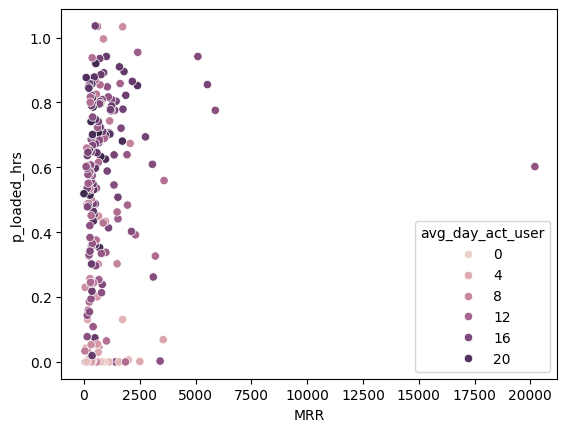

In [18]:
#Se analiza los dias promedio de actividad al mes por usuario activo y pago de suscripcion mensual en relacion al porcentaje de carga de horas

import matplotlib.pyplot as plt #para graficar
import seaborn as sns #para graficar
#Graficamos en la escala original
sns.scatterplot(x="MRR", y="p_loaded_hrs", hue="avg_day_act_user", data=BBDD)

# Mostrar el gráfico
plt.show()

Se observa en el grafico que a mayor promedio de dias de actividad al mes por usuario hay mayor porcenaje de carga de horas. Con respecto al pago de la suscripcion no es tan claro como la anterior variable mencionada pero se puede ver una tendencia a que en los casos donde hay mayor pago de suscripcion hay mayor carga de horas. Esto tiene sentido, dado que quienes mas pagan cuentan con asistencia profesional para ser capacitados en el mejor uso de la herramienta.

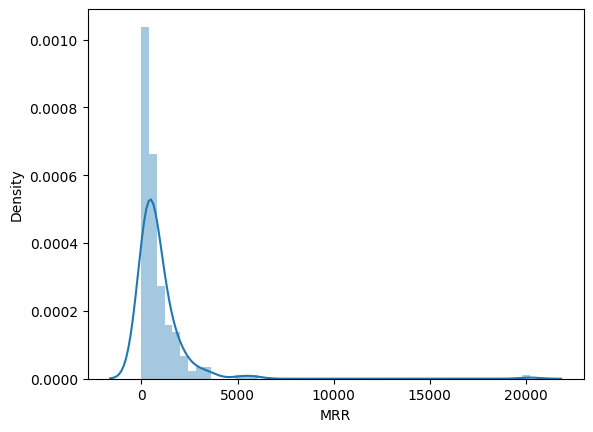

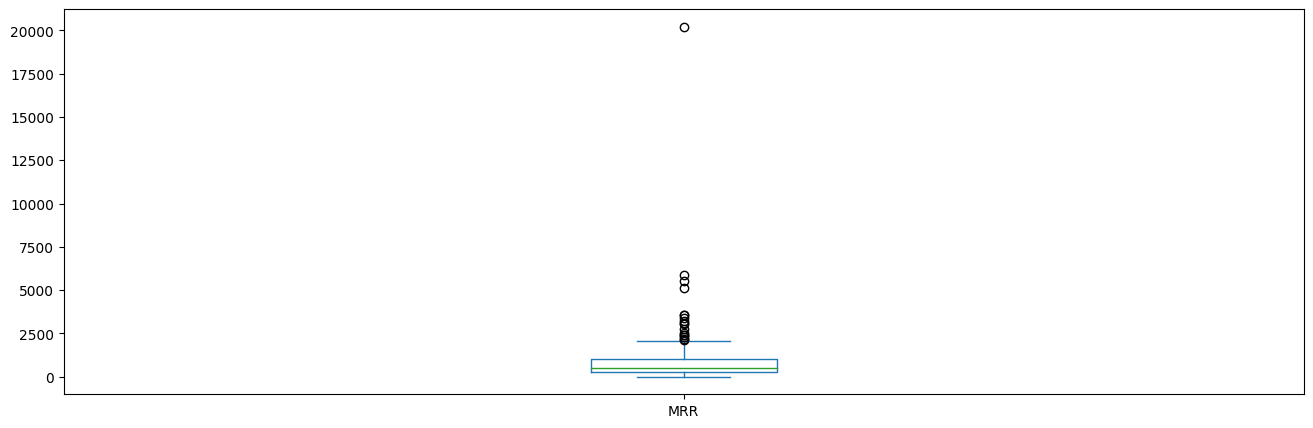

In [21]:
#Se analiza la distribucion del pago de suscripcion

sns.distplot(BBDD['MRR'])
plt.show()
BBDD['MRR'].plot.box(figsize=(16,5))
plt.show()

Se observa que la mayor cantidad de suscriptores pagan poco dinero, hay solo muy pocas observaciones que pagan sumas altas de dinero.
Los ingresos estan dados por una gran cantidad de suscriptores que pagan poco y un pequeño sector de suscriptores que pagan mucho. El MRR o suscripcion mensual varia en funcion de la cantidad de licencias o usuarios que contrate cada empresa o suscriptor, con lo cual, una gran cantidad de pequeñas companias puede estar aportando casi el mismo dinero que una sola compania que contrata muchas licencias o usuarios.

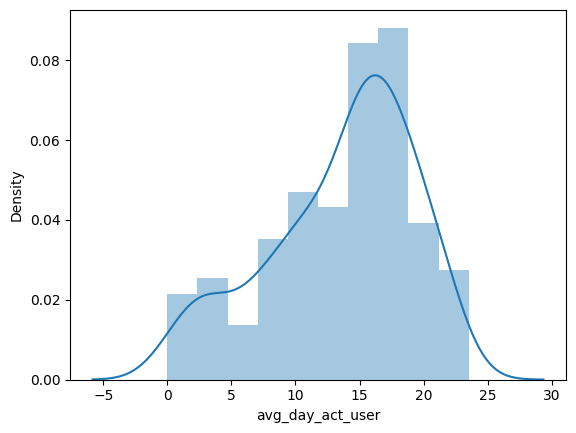

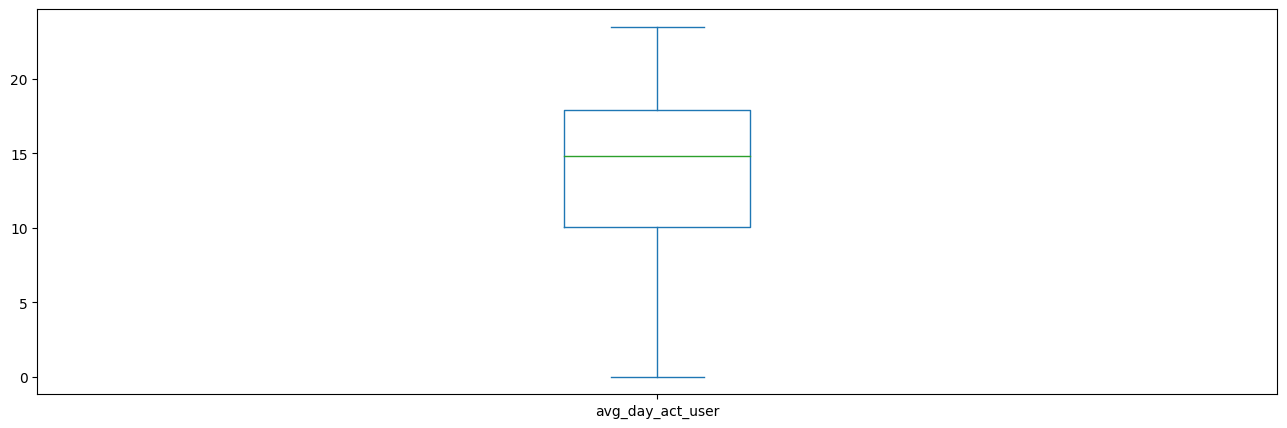

In [22]:
#Se analiza la distribucion de los dias promedio de actividad al mes por usuario activo

sns.distplot(BBDD['avg_day_act_user'])
plt.show()
BBDD['avg_day_act_user'].plot.box(figsize=(16,5))
plt.show()

La distribucion del promedio de dias de actividad parece estar concentrado entre los 15 y 20 dias. Esto es un buen sintoma dado que es una herramienta que se utiliza en el ambito laboral y en general suelen haber 20 dias habiles al mes.

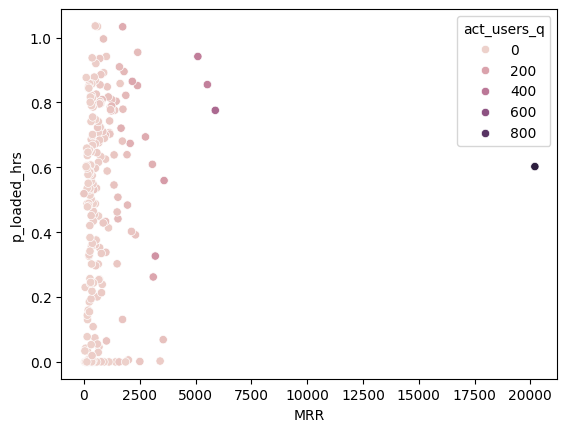

In [23]:
#Se analiza la cantidad de usuarios activos y el pago de la suscripcion en relacion al porcentaje de carga de horas

import matplotlib.pyplot as plt #para graficar
import seaborn as sns #para graficar
#Graficamos en la escala original
sns.scatterplot(x="MRR", y="p_loaded_hrs", hue="act_users_q", data=BBDD)

# Mostrar el gráfico
plt.show()

En general se puede observar que a mayor cantidad de usuarios activos, hay mayor pago de suscripcion (mayor cantidad de licencias contratadas, mayor pago mensual) estas variables se sospecha estan correlacionadas. Con respecto a la otra variable, no es tan clara la relacion pero podriamos ver una tendencia a que el porcentaje de carga de horas parece ser mayor cuando hay mas actividad y mas dinero en juego.

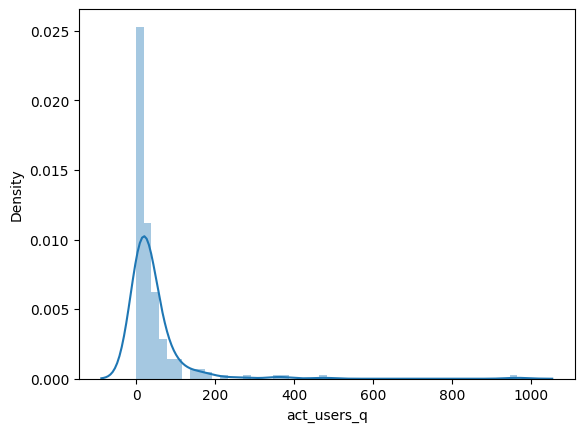

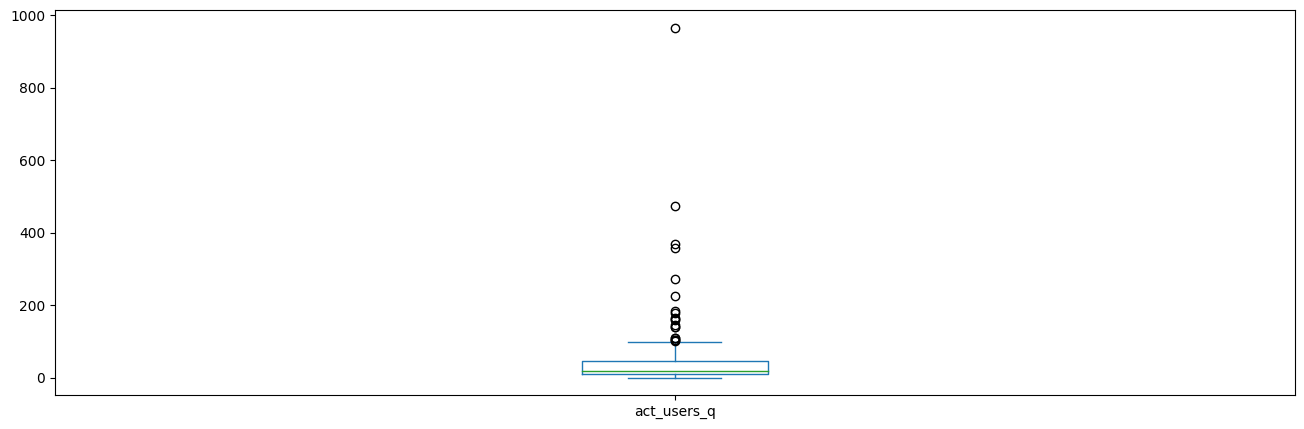

In [24]:
#Se analiza la distribucion de la cantidad de usuarios activos

sns.distplot(BBDD['act_users_q'])
plt.show()
BBDD['act_users_q'].plot.box(figsize=(16,5))
plt.show()

La mayoria de los sucriptores poseen pocos usuarios o licencias con lo cual la media ronda valores bajos de cantidad de usuarios.

In [25]:
#Se analiza una matriz de correlaciones para ver si hay algun grado de correlacion entre las variables que mencionamos
#Eliminamos la variable suscriptores porque no sirve para analizar las correlaciones.
BBDD2=BBDD.drop(['Suscriptores'], axis=1)


<Axes: >

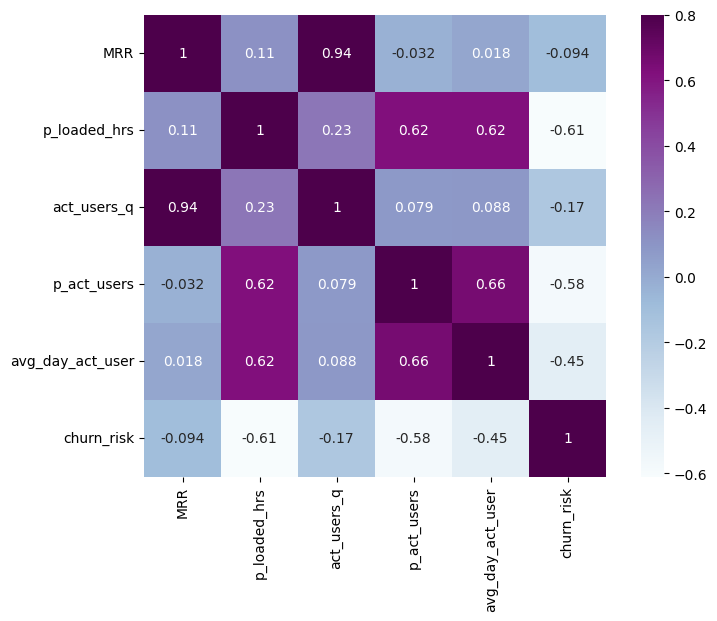

In [26]:
matrix = BBDD2.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

Se observa una alta correlacion entre la cantidad de usuarios activos y MRR tal como se sospechaba. Tambien hay una gran correlacion entre % de usuarios activos y dias promedio de actividad al mes por usuario activo. En no tan menor medida se observa tambien una correlacion entre los dias promedio de actividad al mes por usuario activo y % de horas cargadas y tambien % de usuarios activos con % de horas cargadas.


# **3- Creación de nuevas variables**



Si lo considera oportuno para el problema planteado puede crear nuevas variables justificando los motivos.

In [27]:
# Se crea una nueva variable con las dos variables mas correlacionadas
#La nueva variable es el pago promedio por usuario activo que consiste en tomar el pago de suscripcion mensual (MRR) y dividirlo por la cantidad de usuarios activos (act_users_q)
BBDD['avg_MRR'] = BBDD['MRR'] / BBDD['act_users_q']
BBDD.head(5)

,Suscriptores,MRR,p_loaded_hrs,act_users_q,p_act_users,avg_day_act_user,churn_risk,avg_MRR
0,1,2504.0,0.0014,48,0.1818,4.2742,1,52.166667
1,2,1990.0,0.0061,31,0.6078,2.8318,1,64.193548
2,3,697.5,0.0002,9,0.6923,3.2879,1,77.500000
3,4,500.0,0.0000,5,0.5000,2.9591,1,100.000000
4,5,595.2,0.2005,21,0.4286,5.5894,1,28.342857


In [28]:
#Para no generar correlaciones eliminamos las variables en cuestion "MRR" y "act_users_q" y reducimos la dimensionalidad
# Eliminar múltiples columnas
columnas_a_eliminar = ['MRR', 'act_users_q']
BBDD.drop(columns=columnas_a_eliminar, inplace=True)
BBDD.head(5)

,Suscriptores,p_loaded_hrs,p_act_users,avg_day_act_user,churn_risk,avg_MRR
0,1,0.0014,0.1818,4.2742,1,52.166667
1,2,0.0061,0.6078,2.8318,1,64.193548
2,3,0.0002,0.6923,3.2879,1,77.500000
3,4,0.0000,0.5000,2.9591,1,100.000000
4,5,0.2005,0.4286,5.5894,1,28.342857


# **4- Reducción de la dimensionalidad**

Si lo considera oportuno para el problema planteado puede aplicar PCA para reducir la dimensionalidad.

In [33]:
#Para poder aplicar este metodo se debe eliminar la variable suscriptores dado que no aporta para este objetivo

BBDD3=BBDD.drop(['Suscriptores'], axis=1)

BBDD3.head(5)

,p_loaded_hrs,p_act_users,avg_day_act_user,churn_risk,avg_MRR
0,0.0014,0.1818,4.2742,1,52.166667
1,0.0061,0.6078,2.8318,1,64.193548
2,0.0002,0.6923,3.2879,1,77.500000
3,0.0000,0.5000,2.9591,1,100.000000
4,0.2005,0.4286,5.5894,1,28.342857


In [34]:
#Se define el conjunto de datos en los que continenen la variable explicativa y la variable target

X = BBDD3[['p_act_users','avg_day_act_user','avg_MRR','churn_risk']]
Y = BBDD3 ['p_loaded_hrs']

In [35]:
# Se chequea si hay valores muy largos para los datos de tipo float64
too_large_values = (X > np.finfo(np.float64).max).sum()
too_large_values

p_act_users         0
avg_day_act_user    0
avg_MRR             4
churn_risk          0
dtype: int64

In [36]:
import numpy as np

#Se chequea si hay valores infinitos
inf_values = np.isinf(X).sum()

# Se chequea si hay valores faltantes
nan_values = np.isnan(X).sum()

print(f"Cantidad de valores infinitos: {inf_values}")
print(f"Cantidad de valores faltantes: {nan_values}")

Cantidad de valores infinitos: p_act_users         0
avg_day_act_user    0
avg_MRR             4
churn_risk          0
dtype: int64
Cantidad de valores faltantes: p_act_users         0
avg_day_act_user    0
avg_MRR             0
churn_risk          0
dtype: int64


In [37]:
#Se reemplazan los valores infinitos por valores faltantes para poder reconocerlos
X = X.replace([np.inf, -np.inf], np.nan)


In [38]:
#Para darle un tratamiento a los valores faltantes se calcula el valor maximo de "avg_MRR"
max_avg_MRR = X['avg_MRR'].max()
max_avg_MRR


1410.0

In [39]:
#Se reemplazan los NaN por el valor maximo calculado
X['avg_MRR'].fillna(max_avg_MRR, inplace=True)



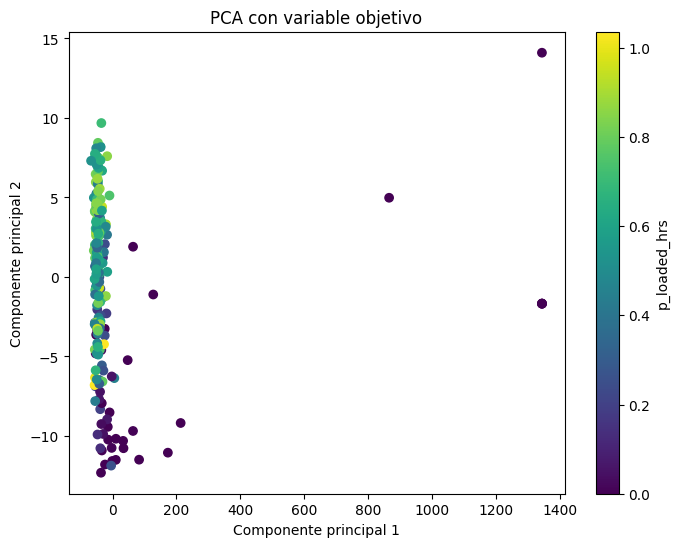

In [40]:
#Se aplica PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Crear un objeto PCA con el número de componentes deseados
pca = PCA(n_components=2)

# Se ajustar el modelo PCA a las variables explicativas X y se transforman
X_pca = pca.fit_transform(X)

# Graficar los datos transformados
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('PCA con variable objetivo')
plt.colorbar(label='p_loaded_hrs')
plt.show()


## **Preparacion de los datos**

In [41]:
#Se separan las variables predictoras (X) y la variable objetivo (y)
X = X_pca
y = Y

In [42]:
#Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [43]:
# Convertimos X_train en Pandas DataFrame
X_train = pd.DataFrame(X_train)

# **5- Aplicación de Métodos Predictivos de Regresión.**

Para el problema planteado debe aplicar como mínimo un método predictivos no ensambles y dos
ensambles.
Para cada uno de los métodos aplicados debe informar por lo menos dos métricas de evaluación del modelo.
Para todos modelos planteados debe realizar CV, y por lo menos para el ensamble selección de
parámetros.

Metodos a utilizar:
- Método no ensamblado: Regresión lineal
- Metodo no ensamblado: Árbol de Regresión
- Métodos ensamblados: Random Forest
- Métodos ensamblados: Gradient Boosting
- Métodos ensamblados: XGboost

## **Regresion lineal**

In [44]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import statsmodels.api as sm #Nos permite acceder al conjunto de datos y realizar regresión lineal
from scipy.stats import shapiro

In [45]:
#Planteamos el modelo de regresion usando lo obtenido via PCA
Modelo = sm.OLS(Y, sm.add_constant(X_pca)).fit()
print(Modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           p_loaded_hrs   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     71.98
Date:                Fri, 24 May 2024   Prob (F-statistic):           1.24e-24
Time:                        00:18:05   Log-Likelihood:                 3.8341
No. Observations:                 217   AIC:                            -1.668
Df Residuals:                     214   BIC:                             8.472
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4875      0.016     29.999      0.0

**R-squared:** Es el coeficiente de determinación, que indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. En este caso, el R cuadrado es 0.402, lo que significa que aproximadamente el 40.2% de la variabilidad en la variable dependiente "p_loaded_hrs" puede ser explicada por las variables independientes incluidas en el modelo.

**Adj. R-squared:** Es una versión ajustada de R cuadrado que tiene en cuenta el número de predictores en el modelo y es útil cuando se comparan modelos con diferentes números de predictores.

**F-statistic:** Es una estadística de prueba para evaluar la significancia global del modelo. Un valor alto del estadístico F y un valor bajo del p-valor (Prob (F-statistic)) indican que el modelo en su conjunto es significativo. En este caso, el valor del estadístico F es 71.98 con un p-valor muy pequeño, lo que sugiere que el modelo es significativo en general.

**coef:** Son los coeficientes de regresión estimados para cada variable independiente. Por ejemplo, para la variable constante, el coeficiente es 0.4875. Esto significa que, manteniendo todas las demás variables constantes, se espera un aumento de 0.4875 unidades en "p_loaded_hrs" por cada unidad de cambio en la constante.

**std err:** Son los errores estándar de los coeficientes de regresión. Indican la precisión con la que se estima cada coeficiente.

**t-statistic:** Es una medida de la significancia individual de cada coeficiente. Un valor absoluto alto del estadístico t y un valor bajo del p-valor indican que el coeficiente es significativamente diferente de cero.

**P>|t|:** Es el valor p asociado con el estadístico t. Indica la probabilidad de observar un estadístico t tan extremo como el observado, bajo la hipótesis nula de que el coeficiente correspondiente es igual a cero.

**[0.025, 0.975]:** Son los intervalos de confianza del 95% para los coeficientes de regresión. Estos intervalos indican el rango dentro del cual es probable que se encuentre el verdadero valor del coeficiente con un nivel de confianza del 95%.

**Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis:** Son estadísticas de diagnóstico que pueden ayudar a evaluar la suposición de normalidad de los residuos y otros supuestos del modelo. Por ejemplo, Omnibus y Jarque-Bera prueban la normalidad de los residuos. Un p-valor bajo en estas pruebas indica que los residuos no están normalmente distribuidos. Durbin-Watson prueba la autocorrelación de los residuos, donde un valor cercano a 2 indica que no hay autocorrelación.

**No. Observations:** Es el número de observaciones (muestras) en el conjunto de datos.

**Df Residuals, Df Model:** Son los grados de libertad de los residuos y del modelo, respectivamente.

**AIC, BIC:** Son criterios de información que se utilizan para comparar modelos. Valores más bajos indican un mejor ajuste del modelo, teniendo en cuenta la cantidad de parámetros utilizados.


In [46]:
!pip install --upgrade statsmodels

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que y_true son los valores reales y y_pred son las predicciones del modelo
y_true = Y
y_pred = Modelo.predict(sm.add_constant(X_pca))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_true, y_pred)
print("Coeficiente de determinación (R²):", r2)


Error cuadrático medio (MSE): 0.05651699040338068
Coeficiente de determinación (R²): 0.4021534415455278


- **Error cuadrático medio (MSE)**: El MSE es una medida de la calidad de la predicción en un modelo de regresión. En este caso, el MSE es 0.0565, lo que indica que, en promedio, las predicciones del modelo se desvían en 0.0565 unidades al cuadrado de los valores reales. Un MSE más bajo indica una mejor calidad de la predicción.
- **Coeficiente de determinación (R²)**: El coeficiente de determinación, también conocido como R cuadrado, es una medida de cuánta variabilidad en la variable dependiente es explicada por el modelo. En este caso, el R² es 0.402, lo que significa que el 40.2% de la variabilidad en la variable dependiente es explicada por el modelo. Un R² más alto indica un mejor ajuste del modelo a los datos.


Con base en estos valores, podemos concluir que el modelo tiene un rendimiento aceptable, pero aún queda un porcentaje significativo de variabilidad en la variable dependiente que no está siendo explicada por el modelo. Sería importante explorar posibles mejoras en el modelo para aumentar su capacidad predictiva y explicativa.







## **Árbol de Regresión**

In [48]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm #Nos permite acceder al conjunto de datos y realizar regresión lineal
from sklearn.tree import DecisionTreeRegressor #árboles de regresión
from sklearn.ensemble import RandomForestRegressor #RF para regresion
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error,mean_squared_error

In [49]:
# Crear el árbol de decisión
tree1 = DecisionTreeRegressor(max_depth=3)

In [50]:
# Entrenamos el modelo con los datos de entrenamiento
tree1.fit(X_train, y_train)

# Predecimos los valores de la variable objetivo para los datos de prueba
y_pred1 = tree1.predict(X_test)

In [51]:
# Evaluar el  modelo con R²
score1 = tree1.score(X_test, y_test) #El deafault es Rcuadrado
print('El coeficiente de determinación del modelo es: {:.2f}'.format(score1))

El coeficiente de determinación del modelo es: 0.57


<Figure size 2000x1000 with 0 Axes>

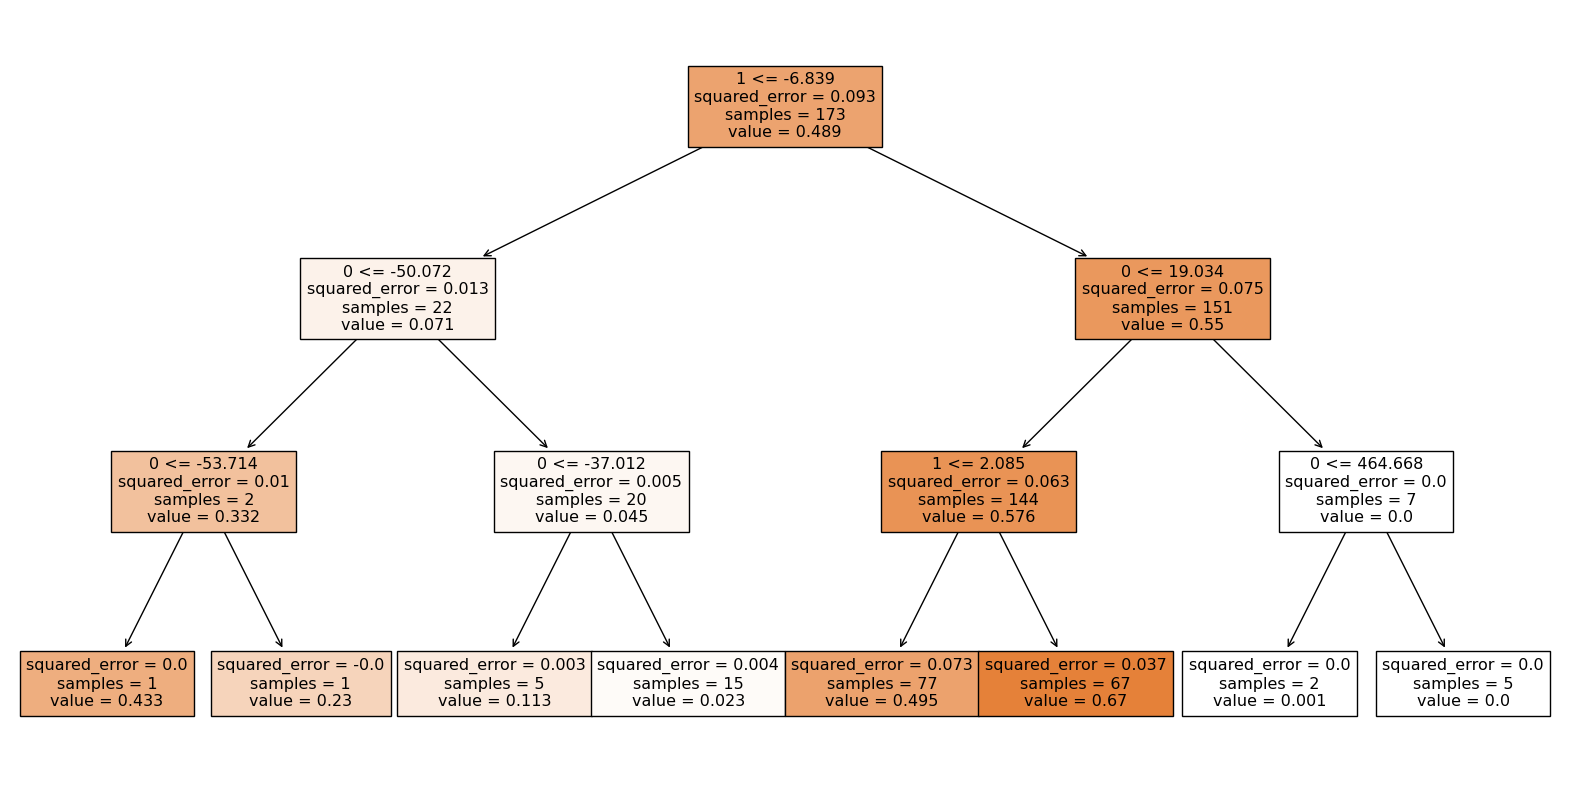

In [52]:
plt.figure(figsize=(20,10))
feature_names = X_train.columns
# Graficamos  el árbol de regresión
plt.figure(figsize=(20,10))
plot_tree(tree1, feature_names=feature_names, filled=True)
plt.show()

In [53]:
# Realizar predicciones para los datos de entrenamiento y prueba
y_train_pred = tree1.predict(X_train)
y_test_pred = tree1.predict(X_test)

# Calculamos las medidas para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculamos las medidas para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Creamos un DataFrame con las medidas
df = pd.DataFrame({
    "Conjunto": ["Entrenamiento", "Prueba"],
    "MSE": [mse_train, mse_test],
    "MAE": [mae_train, mae_test],
    "R2": [r2_train, r2_test]
})

# Muestra el DataFrame
display(df)

,Conjunto,MSE,MAE,R2
0,Entrenamiento,0.046879,0.162124,0.493944
1,Prueba,0.044304,0.157092,0.565493


In [54]:
#Se hace cross validation para definir los posibles mejores parametros

from sklearn.model_selection import GridSearchCV

# Definir los valores posibles para los parámetros del modelo
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

# Crear un objeto de árbol de regresión
treereg = DecisionTreeRegressor()

# Crear un objeto GridSearchCV con el modelo y los parámetros
grid_searchMSE = GridSearchCV(treereg, param_grid, cv=5, n_jobs=-1)

# Ajustar el modelo con los datos
grid_searchMSE.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(grid_searchMSE.best_params_)

# Imprimir la mejor puntuación del modelo
print(grid_searchMSE.best_score_)

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.299812897140228


In [55]:
# Evaluamos el modelo en el conjunto de testeo
y_pred = grid_searchMSE.predict(X_test) #Usamos el resultado obtenido con "la grilla"

# Obtenemos las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE en testeo: ', mse)
print('R2 en testeo: ', r2)

MSE en testeo:  0.039163460220309254
R2 en testeo:  0.615907286830544


<Figure size 2000x1000 with 0 Axes>

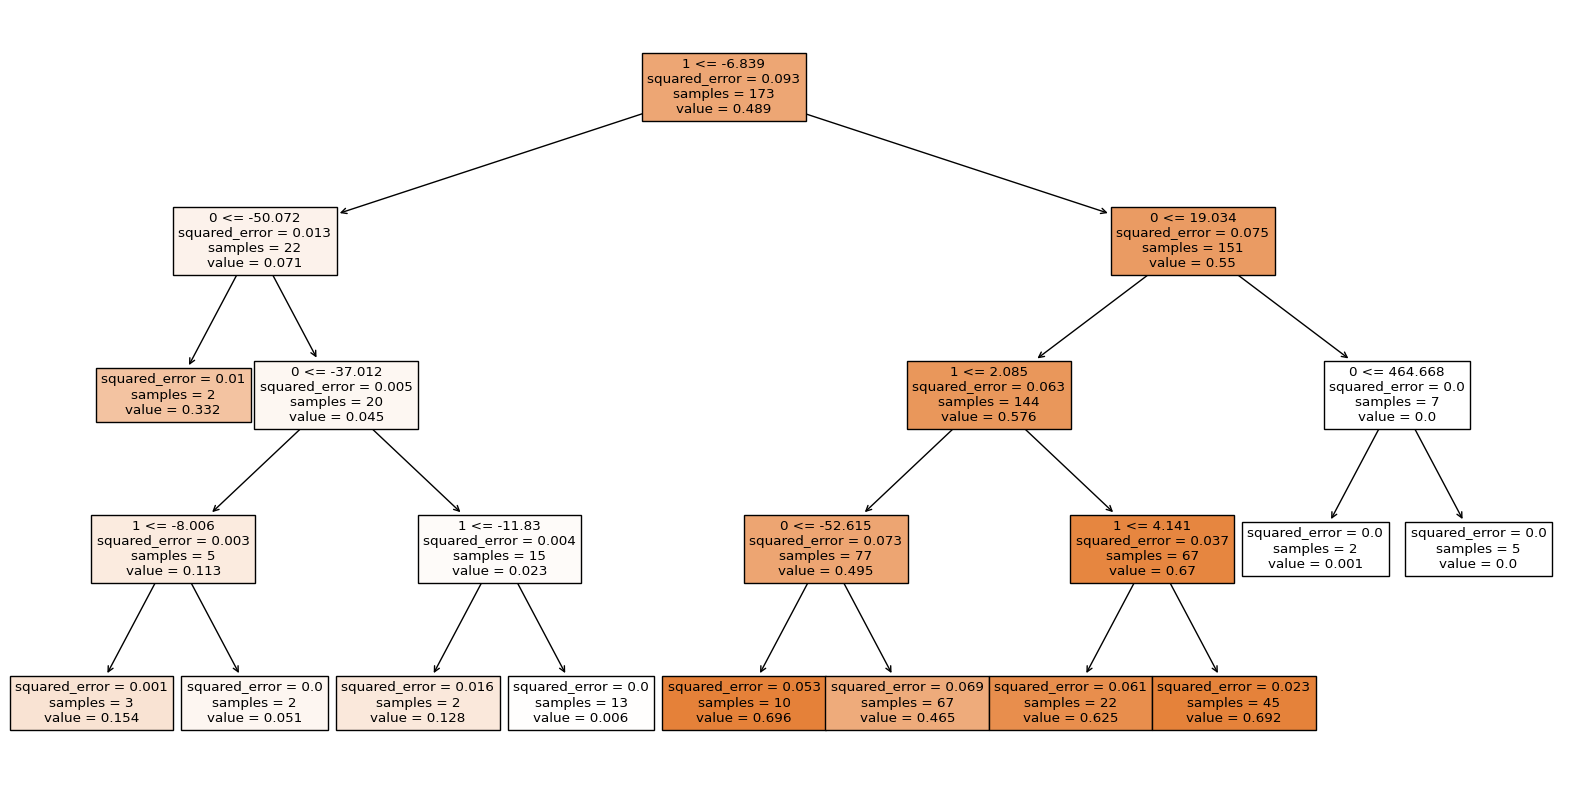

In [56]:
#Graficamos los árboles
best_treeMSE = grid_searchMSE.best_estimator_
plt.figure(figsize=(20,10))
feature_names = X_train.columns
# Graficamos  el árbol de regresión
plt.figure(figsize=(20,10))
plot_tree(best_treeMSE, feature_names=feature_names, filled=True)
plt.show()


Basado en las medidas de evaluación proporcionadas para un modelo de árbol de regresión:

- **Error cuadrático medio (MSE):**
El MSE en el conjunto de pruebas es 0.0392, lo que indica que, en promedio, las predicciones del modelo se desvían en 0.0392 unidades al cuadrado de los valores reales. Un MSE más bajo indica un mejor ajuste del modelo a los datos.

- **Coeficiente de determinación (R²):**
El R² en el conjunto de pruebas es 0.6159, lo que significa que aproximadamente el 61.6% de la variabilidad en la variable dependiente es explicada por el modelo. Un R² más alto indica un mejor ajuste del modelo a los datos.

En resumen, los resultados indican que el modelo de árbol de regresión tiene un buen rendimiento en el conjunto de pruebas. El MSE relativamente bajo y el R² relativamente alto sugieren que el modelo es capaz de hacer predicciones precisas y explicar una parte significativa de la variabilidad en los datos de prueba. Sin embargo, siempre es importante considerar otros aspectos del modelo, como el potencial de sobreajuste y la interpretabilidad, para una evaluación completa.

## **Random Forest**

In [57]:
# Importamos RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Creando el modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=2024)

# Entrenando el modelo en el conjunto de entrenamiento
rf.fit(X_train, y_train)

# Haciendo predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluando el rendimiento del modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculando el R2 utilizando el método score del modelo
r2 = rf.score(X_test, y_test)
print("R2:", r2)


MSE: 0.03797594923652273
R2: 0.6275537121748646


In [58]:
#Se sigue con cross validation

rf = RandomForestRegressor(random_state=2024)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
r2scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='r2')
print("MSE promedio: {:.4f}".format(-scores.mean()))
print("Desviación estándar del MSE: {:.4f}".format(scores.std()))
print("R2 promedio: {:.4f}".format(r2scores.mean()))
print("Desviación estándar del R2: {:.4f}".format(r2scores.std()))

MSE promedio: 0.0737
Desviación estándar del MSE: 0.0217
R2 promedio: 0.1549
Desviación estándar del R2: 0.2779


In [59]:
# Realizar una validación cruzada con return_train_score=True
resultados = cross_validate(rf, X_train, y_train, cv=10, scoring=('neg_mean_squared_error', 'r2'), return_train_score=True)

# Obtener el historial de entrenamiento y prueba
train_mse = -resultados['train_neg_mean_squared_error']
test_mse = -resultados['test_neg_mean_squared_error']
train_r2 = resultados['train_r2']
test_r2 = resultados['test_r2']

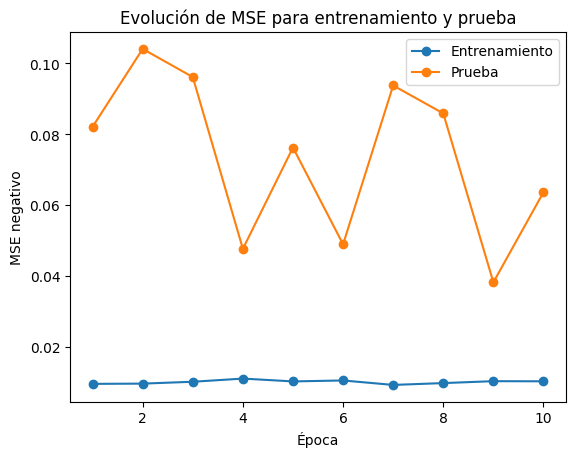

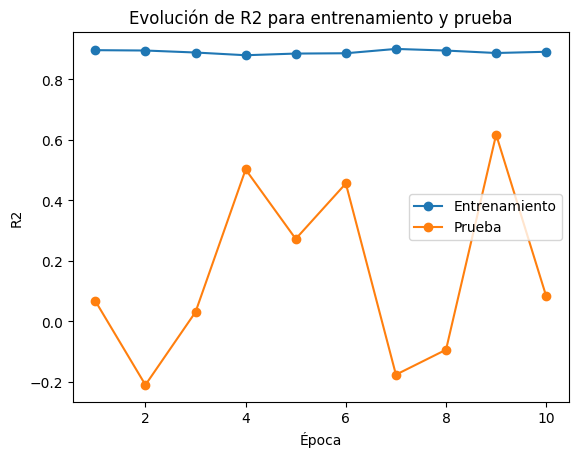

In [60]:
# Definir una lista con el número de épocas
epochs = list(range(1, 11))

# Graficar la evolución de MSE para entrenamiento y prueba
plt.plot(epochs, train_mse, 'o-', label="Entrenamiento")
plt.plot(epochs, test_mse, 'o-', label="Prueba")

# Etiquetas y título del gráfico
plt.xlabel("Época")
plt.ylabel("MSE negativo")
plt.title("Evolución de MSE para entrenamiento y prueba")
plt.legend()

# Mostrar el gráfico
plt.show()

# Graficar la evolución de R2 para entrenamiento y prueba
plt.plot(epochs, train_r2, 'o-', label="Entrenamiento")
plt.plot(epochs, test_r2, 'o-', label="Prueba")

# Etiquetas y título del gráfico
plt.xlabel("Época")
plt.ylabel("R2")
plt.title("Evolución de R2 para entrenamiento y prueba")
plt.legend()

# Mostrar el gráfico
plt.show()


In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=2024), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_rf.best_params_)
print("Mejor MSE promedio:", -grid_rf.best_score_)

Mejores hiperparámetros: {'max_depth': 3, 'n_estimators': 50}
Mejor MSE promedio: 0.056285664157552415


In [62]:
best_rf = grid_rf.best_estimator_
best_rf

RandomForestRegressor(max_depth=3, n_estimators=50, random_state=2024)

In [63]:
print(best_rf)

RandomForestRegressor(max_depth=3, n_estimators=50, random_state=2024)


In [64]:
y_test_pred=best_rf.predict(X_test)
y_train_pred=best_rf.predict(X_train)

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculamos las medidas para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculamos las medidas para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Creamos un DataFrame con las medidas
df = pd.DataFrame({
    "Conjunto": ["Entrenamiento", "Prueba"],
    "MSE": [mse_train, mse_test],
    "MAE": [mae_train, mae_test],
    "R2": [r2_train, r2_test]
})

# Muestra el DataFrame
display(df)


,Conjunto,MSE,MAE,R2
0,Entrenamiento,0.044641,0.166034,0.518102
1,Prueba,0.039375,0.152366,0.613829


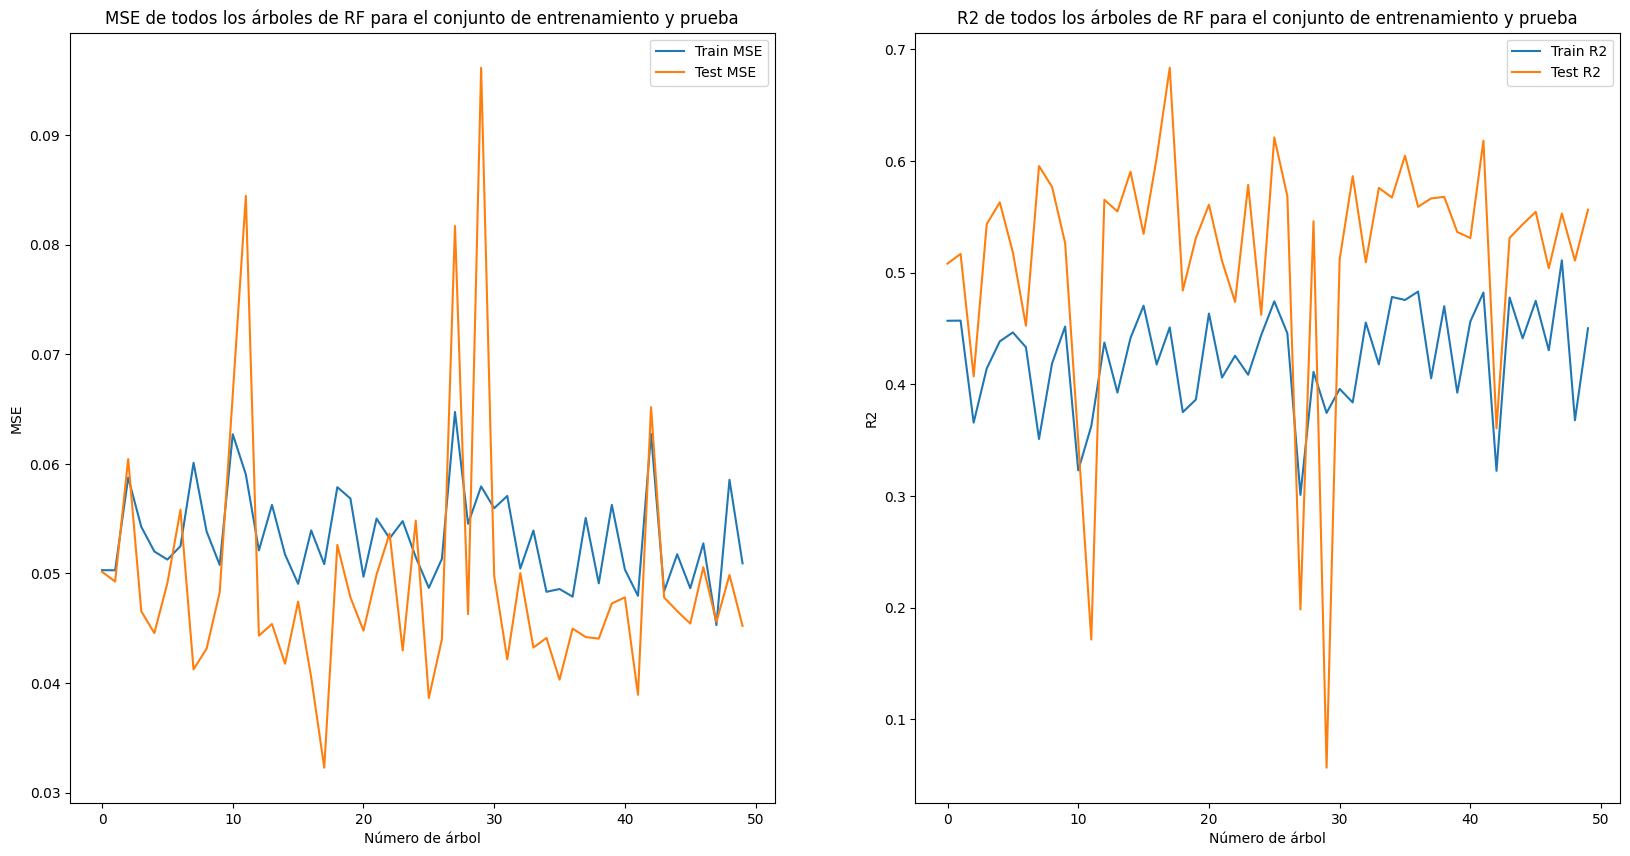

In [66]:
# Obtenemos el MSE y R2 de todos los árboles del RF para el conjunto de entrenamiento y prueba
train_mse_list = []
train_r2_list = []
test_mse_list = []
test_r2_list = []

for tree in best_rf.estimators_:
    y_train_pred = tree.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse_list.append(train_mse)
    train_r2_list.append(train_r2)

    y_test_pred = tree.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse_list.append(test_mse)
    test_r2_list.append(test_r2)

# Graficamos el MSE y R2 de todos los árboles del RF para el conjunto de entrenamiento y prueba
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot(range(len(train_mse_list)), train_mse_list, label='Train MSE')
plt.plot(range(len(test_mse_list)), test_mse_list, label='Test MSE')
plt.xlabel('Número de árbol')
plt.ylabel('MSE')
plt.title('MSE de todos los árboles de RF para el conjunto de entrenamiento y prueba')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(train_r2_list)), train_r2_list, label='Train R2')
plt.plot(range(len(test_r2_list)), test_r2_list, label='Test R2')
plt.xlabel('Número de árbol')
plt.ylabel('R2')
plt.title('R2 de todos los árboles de RF para el conjunto de entrenamiento y prueba')
plt.legend()

plt.show()

En conclusión:
- **Error cuadrático medio (MSE**):

En el conjunto de entrenamiento, el MSE es 0.0446, lo que indica que, en promedio, las predicciones del modelo se desvían en 0.0446 unidades al cuadrado de los valores reales.
En el conjunto de prueba, el MSE es 0.0394, lo que sugiere que el modelo generaliza bien en datos no vistos, ya que el MSE en el conjunto de prueba es menor que en el conjunto de entrenamiento.

- **Error absoluto medio (MAE):**

En el conjunto de entrenamiento, el MAE es 0.166, lo que significa que, en promedio, las predicciones del modelo se desvían en 0.166 unidades de los valores reales.
En el conjunto de prueba, el MAE es 0.152, lo que indica que el modelo tiene una buena capacidad de generalización, ya que el MAE en el conjunto de prueba es menor que en el conjunto de entrenamiento.

- **Coeficiente de determinación (R²)**:

En el conjunto de entrenamiento, el R² es 0.518, lo que significa que aproximadamente el 51.8% de la variabilidad en la variable dependiente es explicada por el modelo.
En el conjunto de prueba, el R² es 0.614, lo que sugiere que el modelo tiene una capacidad decente para explicar la variabilidad en datos no vistos.

En resumen, los resultados indican que el modelo de Random Forest tiene un buen rendimiento tanto en el conjunto de entrenamiento como en el de prueba, con un MSE y MAE relativamente bajos y un R² considerablemente alto. Esto sugiere que el modelo es capaz de hacer predicciones precisas y explicar una parte significativa de la variabilidad en los datos de prueba. Sin embargo, siempre es importante considerar la posibilidad de ajuste excesivo y explorar técnicas para mejorar aún más el rendimiento del modelo.








## **Gradient Boosting**

Se usa la misma cantidad de estimadores 100 y semilla 2024

In [67]:
#Aplicación
import sklearn
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state=2024)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=2024)

In [68]:
#predicciones
ypred_test_gbr = gbr.predict(X_test)

In [69]:
#se calcula el MSE
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(y_test, ypred_test_gbr, squared=False))

#se calcula el R-Squared
from sklearn.metrics import r2_score
print("R2:",r2_score(y_test, ypred_test_gbr, multioutput='variance_weighted'))

MSE: 0.20357928502099845
R2: 0.5935359114087928


In [73]:
from sklearn.metrics import accuracy_score

#Varias opciones de modelos para encontrar los mejores parametros

lr_list = [0.1, 0.25, 0.5, 0.75, 1]
ne_list=[50, 100, 150, 200, 250, 300, 400, 500]

LR_GBr=[]
NE_GBr=[]
R2_test=[]
RMSE_test=[]

for learning_rate in lr_list:
  for n_estimators in ne_list:
    gbr_2 = GradientBoostingRegressor( n_estimators=n_estimators, learning_rate=learning_rate, random_state=2024)
    gbr_2.fit(X_train, y_train)
    LR_GBr.append(learning_rate)
    NE_GBr.append(n_estimators)
    RMSE_test.append(round(mean_squared_error(y_test, gbr_2.predict(X_test), squared=False),4))
    R2_test.append(round(r2_score(y_test, gbr_2.predict(X_test), multioutput='variance_weighted'),4))

In [74]:
resultados_GB={
              'Learning_rate': LR_GBr,
              'N_estimators':NE_GBr,
              'Coef R2': R2_test,
              'MSE': RMSE_test
              }
resultados_GB = pd.DataFrame(resultados_GB)
resultados_GB.sort_values('MSE', ascending=True)

,Learning_rate,N_estimators,Coef R2,MSE
0,0.10,50,0.5999,0.2020
1,0.10,100,0.5935,0.2036
8,0.25,50,0.5876,0.2051
2,0.10,150,0.5818,0.2065
3,0.10,200,0.5511,0.2139
9,0.25,100,0.5428,0.2159
4,0.10,250,0.5416,0.2162
16,0.50,50,0.5415,0.2162
5,0.10,300,0.5361,0.2175
17,0.50,100,0.5322,0.2184


Los mejores parametros son 50 estimadores y 0.1 de tasa de aprendizaje

In [75]:
gbr_3 = GradientBoostingRegressor( n_estimators=50, learning_rate=0.1, random_state=2024)
gbr_3.fit(X_train, y_train)
ypred_test_gbr_3 = gbr_3.predict(X_test)

## **XGboost**

Se usa la misma cantidad de estimadores 100 y semilla 2024

In [70]:
#Aplicación
import sklearn
import xgboost as xgb

xgb_1 = xgb.XGBRegressor(n_estimators=100, random_state=2024)
xgb_1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=2024, ...)

In [71]:
ypred_test_xgb = xgb_1.predict(X_test)

In [72]:
#se calcula el MSE
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(y_test, ypred_test_xgb, squared=False))

#se calcula el R-Squared
from sklearn.metrics import r2_score
print("R2:",r2_score(y_test, ypred_test_xgb, multioutput='variance_weighted'))

MSE: 0.20914822393757118
R2: 0.5709939925369136


In [76]:
#Entrenando varios modelos para encontrar los mejores parametros

lr_list = [0.1, 0.25, 0.5, 0.75, 1]
ne_list=[50, 100, 150, 200, 250, 300, 400, 500]

LR_XGBr=[]
NE_XGBr=[]
R2_test_xgb=[]
RMSE_test_xgb=[]

for learning_rate in lr_list:
  for n_estimators in ne_list:
    xgbr_2 = xgb.XGBRegressor( n_estimators=n_estimators, learning_rate=learning_rate, random_state=2024, silent=True)
    xgbr_2.fit(X_train, y_train)
    LR_XGBr.append(learning_rate)
    NE_XGBr.append(n_estimators)
    RMSE_test_xgb.append(round(mean_squared_error(y_test, xgbr_2.predict(X_test), squared=False),4))
    R2_test_xgb.append(round(r2_score(y_test, xgbr_2.predict(X_test), multioutput='variance_weighted'),4))

In [77]:
resultados_XGBr={
              'Learning_rate': LR_XGBr,
              'N_estimators':NE_XGBr,
              'Coef R2': R2_test_xgb,
              'MSE': RMSE_test_xgb
              }
resultados_XGBr = pd.DataFrame(resultados_XGBr)
resultados_XGBr.sort_values('MSE', ascending=True)

,Learning_rate,N_estimators,Coef R2,MSE
0,0.10,50,0.5859,0.2055
23,0.50,500,0.5733,0.2086
22,0.50,400,0.5733,0.2086
21,0.50,300,0.5733,0.2086
20,0.50,250,0.5733,0.2086
18,0.50,150,0.5733,0.2086
17,0.50,100,0.5733,0.2086
16,0.50,50,0.5733,0.2086
19,0.50,200,0.5733,0.2086
8,0.25,50,0.5726,0.2088


Los mejores parametros son 50 estimadores y 0.1 de tasa de aprendizaje

In [78]:
xgbr_3=xgb.XGBRegressor( n_estimators=50, learning_rate=0.1, random_state=2024, silent=True)
xgbr_3.fit(X_train, y_train)
ypred_test_xgbr_3=xgbr_3.predict(X_test)

## **Analisis de GB y XGB**

In [79]:
R2_GBR =round(r2_score(y_test, ypred_test_gbr_3, multioutput='variance_weighted'),4)
R2_XGBR=round(r2_score(y_test, ypred_test_xgbr_3, multioutput='variance_weighted'),4)

RMSE_GBR = round(mean_squared_error(y_test, ypred_test_gbr_3, squared=False),4)
RMSE_XGB = round(mean_squared_error(y_test, ypred_test_xgbr_3, squared=False),4)

In [80]:
resultados_BEST={'modelo': ['GRADIENT BOOSTING', 'XGB'],
                 'R2': [R2_GBR, R2_XGBR],
                 'MSE': [RMSE_GBR, RMSE_XGB]
                }
resultados_BEST = pd.DataFrame(resultados_BEST)
resultados_BEST.sort_values('MSE', ascending=True)

,modelo,R2,MSE
0,GRADIENT BOOSTING,0.5999,0.2020
1,XGB,0.5859,0.2055


Basado en los resultados obtenidos mediante Gradient Boosting y XGBoost:

**- Coeficiente de determinación (R²):**

**Para Gradient Boosting**: El valor de R² es 0.5999, lo que indica que alrededor del 59.99% de la variabilidad en la variable dependiente es explicada por el modelo.

**Para XGBoost**: El valor de R² es 0.5859, lo que sugiere que aproximadamente el 58.59% de la variabilidad en la variable dependiente es explicada por el modelo.

- **Error cuadrático medio de raíz (MSE):**

**Para Gradient Boosting:** El MSE es 0.2020.

**Para XGBoost:** El MSE es 0.2055.

En general, ambos modelos (Gradient Boosting y XGBoost) parecen tener un desempeño similar en términos de R², con Gradient Boosting mostrando una ligera mejora en la capacidad de explicar la variabilidad de la variable dependiente. Además, Gradient Boosting tiene un MSE ligeramente menor en comparación con XGBoost, lo que sugiere una mejor precisión en las predicciones. Sin embargo, la diferencia entre los modelos puede ser sutil y podría depender de las preferencias del usuario. En general, ambos modelos son opciones viables para realizar predicciones en este conjunto de datos, con Grading Boosting mostrando un rendimiento ligeramente superior en términos de precisión y capacidad explicativa.